In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [40]:
pd.set_option('display.max_columns', None)

In [41]:
df_homicidios = pd.read_excel("homicidios.xlsx")
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [42]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<h3>Selección de columnas</h3>

In [43]:
df_homicidios = df_homicidios[["ID","N_VICTIMAS","FECHA","AAAA","MM", "DD","HORA","HH","LUGAR_DEL_HECHO","TIPO_DE_CALLE","Calle","COMUNA","pos x","pos y","VICTIMA","ACUSADO"]]

<h3>Columna Lugar del Hecho</h3>

In [44]:
df_homicidios.iloc[343].loc['LUGAR_DEL_HECHO']

'Córdoba Av. 2215\n\n'

<h4>Reemplazando caracteres</h4>

In [45]:
df_homicidios.at[343,'LUGAR_DEL_HECHO'] = df_homicidios.at[343,'LUGAR_DEL_HECHO'].replace('\n', '')

In [46]:
df_homicidios.iloc[343].loc['LUGAR_DEL_HECHO']

'Córdoba Av. 2215'

<h3>Verificando duplicados</h3>

In [47]:
duplicados = df_homicidios[df_homicidios.duplicated()]
print(duplicados.head())

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, COMUNA, pos x, pos y, VICTIMA, ACUSADO]
Index: []


<h3>n° de accidentes por comuna<h3>

In [48]:
df_comuna = df_homicidios[['ID', 'COMUNA']].groupby('COMUNA').count()
df_comuna = df_comuna.reset_index()
df_comuna.columns = ['COMUNAS', 'n° de accidentes']

fig = px.bar(df_comuna, x='COMUNAS', y='n° de accidentes')
fig.update_xaxes(type='category')
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

<p>Tenemos 2 registros para la comuna 0, debe tratarse de un error ya que no existe esa comuna</p>

In [49]:
df_homicidios = df_homicidios[df_homicidios['COMUNA'] != 0]

<h3>Columna Pos x y Pos y</h3>

In [50]:
df_homicidios['pos y'].value_counts()

pos y
.               10
-34.68475866     5
-34.54979510     4
-34.53476874     4
-34.66977709     4
                ..
-34.58498660     1
-34.59573848     1
-34.63997430     1
-34.64234110     1
-34.58679619     1
Name: count, Length: 605, dtype: int64

<p>Eliminamos los valores faltantes</p>

In [51]:
df_homicidios = df_homicidios[df_homicidios['pos x'] != '.']
df_homicidios = df_homicidios[df_homicidios['pos y'] != '.']

In [52]:
df_homicidios['pos y'].value_counts()

pos y
-34.68475866    5
-34.54979510    4
-34.53476874    4
-34.66977709    4
-34.63070603    3
               ..
-34.58498660    1
-34.59573848    1
-34.63997430    1
-34.64234110    1
-34.58679619    1
Name: count, Length: 604, dtype: int64

<h3>Columna HORA</h3>

In [53]:
df_homicidios['HORA'] = df_homicidios['HORA'].astype(str)
filtro = -df_homicidios['HORA'].str.contains(r'^\d{2}:\d{2}:\d{2}$')

df_sin_formato = df_homicidios[filtro]

In [54]:
df_sin_formato

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,VICTIMA,ACUSADO
439,2019-0022,1,2019-03-15,2019,3,15,1900-01-02 00:00:00,0,ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX),AVENIDA,ENTRE RIOS AV.,1,-58.39123782,-34.62352245,AUTO,SD
441,2019-0024,1,2019-03-19,2019,3,19,1900-01-14 07:12:00,7,ANTARTIDA ARGENTINA AV. 1325,AVENIDA,ANTARTIDA ARGENTINA AV.,1,-58.37208118,-34.58541957,MOTO,CARGAS
496,2019-0080,1,2019-09-17,2019,9,17,1900-01-04 18:40:00,18,"CABILDO AV. y PAZ, GRAL. AV.",GRAL PAZ,CABILDO AV.,13,-58.47617802,-34.53825652,PEATON,MOTO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",11,-58.52169422,-34.59471640,MOTO,MOTO


<h4>Eliminamos la fila que no tiene hora</h4>

In [55]:
df_homicidios = df_homicidios[df_homicidios['HORA']!='SD']

<h4>Cambiamos el formato de hora</h4>

In [56]:
df_homicidios['HORA'] = pd.to_datetime(df_homicidios['HORA'], errors='coerce').dt.strftime('%H:%M:%S')

C:\Users\User\AppData\Local\Temp\ipykernel_9988\3710945317.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<h3>Histograma N° de víctimas</h3>

In [57]:
px.histogram(df_homicidios, x='N_VICTIMAS')


<h3>n° de accidentes por horas</h3>

In [58]:
fig = px.histogram(df_homicidios, x="HH")

fig.update_xaxes(
    title_text="Horas"
)
fig.update_yaxes(
    title_text="Frecuencia"  # Cambia el nombre del eje y
)

fig.show()


Ocurren más accidentes entre las horas 5-7

In [59]:
df_homicidios_mes = df_homicidios[['ID', 'MM']].groupby('MM').count()
df_homicidios_mes = df_homicidios_mes.reset_index()
df_homicidios_mes.columns = ['Mes', 'Total']
fig = px.bar(df_homicidios_mes, x='Mes', y='Total')


meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=meses)

fig.update_traces(text=df_homicidios_mes['Total'], textposition='outside')
fig.show()

<h3>Accidentes por mes</h3>

<h3>Accidentes por tipo de calle<h3>

In [60]:
df_homicidios['TIPO_DE_CALLE'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

<h4>Reemplazo "GRAL PAZ" por avenida</h>

In [61]:
df_homicidios['TIPO_DE_CALLE'] = df_homicidios['TIPO_DE_CALLE'].replace("GRAL PAZ", "AVENIDA")

In [62]:
df_tipo_calle = df_homicidios[['ID', 'TIPO_DE_CALLE']].groupby('TIPO_DE_CALLE').count()
df_tipo_calle = df_tipo_calle.reset_index()
df_tipo_calle

,TIPO_DE_CALLE,ID
0,AUTOPISTA,57
1,AVENIDA,492
2,CALLE,134


In [63]:
fig = px.pie(df_tipo_calle, names='TIPO_DE_CALLE', values='ID')
fig.update_traces(textinfo='value+percent')
fig.show()

<p>Las avenidas concentran la mayor parte de los accidentes ocurridos</p>

<h3>Accidentes por año</h3>

In [64]:
df_homicidios_total = df_homicidios[['ID', 'AAAA']].groupby('AAAA').count()
df_homicidios_total = df_homicidios_total.reset_index()
df_homicidios_total.columns = ["AÑO", "TOTAL ACCIDENTES"]

px.line(df_homicidios_total, x='AÑO', y='TOTAL ACCIDENTES')

<p>Se puede notar una considerable disminución de accidentes en el año 2020, seguramente relacionado con las medidas tomadas por el gobierno de Argentina por la COVID 19</p>

<h3>ACUSADOS POR TIPO DE CALLE</h3>

In [65]:
df_homicidios['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

<p>Para los valores de "SD" significa que no se tiene datos sobre el vehículo participante, no es un valor nulo por lo que no lo eliminé</p>

In [66]:
df_homicidios_acusado = df_homicidios[['ID', 'ACUSADO', 'TIPO_DE_CALLE']].groupby(['TIPO_DE_CALLE','ACUSADO']).count()
df_homicidios_acusado = df_homicidios_acusado.reset_index()
df_homicidios_acusado

,TIPO_DE_CALLE,ACUSADO,ID
0,AUTOPISTA,AUTO,15
1,AUTOPISTA,CARGAS,19
2,AUTOPISTA,MOTO,5
3,AUTOPISTA,MULTIPLE,2
4,AUTOPISTA,OBJETO FIJO,11
5,AUTOPISTA,PASAJEROS,3
6,AUTOPISTA,SD,2
7,AVENIDA,AUTO,144
8,AVENIDA,BICICLETA,3
9,AVENIDA,CARGAS,94


In [67]:
fig = px.treemap(df_homicidios_acusado, path=['TIPO_DE_CALLE', 'ACUSADO'], values='ID')
fig.update_traces(textinfo='label+value')
fig.update_layout(
    width=1200,
    height=600
)
fig.show()

<h3>Accidentes por comuna y tipo de vía</h3>

In [68]:
import numpy as np
df_homicidios_comuna_tipo_calle = df_homicidios[['COMUNA', 'TIPO_DE_CALLE', 'ID']].groupby(['COMUNA', 'TIPO_DE_CALLE']).count()
df_homicidios_comuna_tipo_calle = df_homicidios_comuna_tipo_calle.unstack(level='TIPO_DE_CALLE')
df_homicidios_comuna_tipo_calle =  df_homicidios_comuna_tipo_calle.droplevel(0,axis='columns')
df_homicidios_comuna_tipo_calle.replace(np.nan,0, inplace=True)
df_homicidios_comuna_tipo_calle

TIPO_DE_CALLE,AUTOPISTA,AVENIDA,CALLE
COMUNA,,,
1,11.0,56.0,23.0
2,2.0,21.0,2.0
3,1.0,26.0,18.0
4,7.0,47.0,19.0
5,2.0,11.0,9.0
6,0.0,16.0,5.0
7,3.0,47.0,9.0
8,8.0,56.0,1.0
9,12.0,50.0,9.0


Text(0.5, 1.0, 'Accidentes por Comuna y Tipo de Vía')

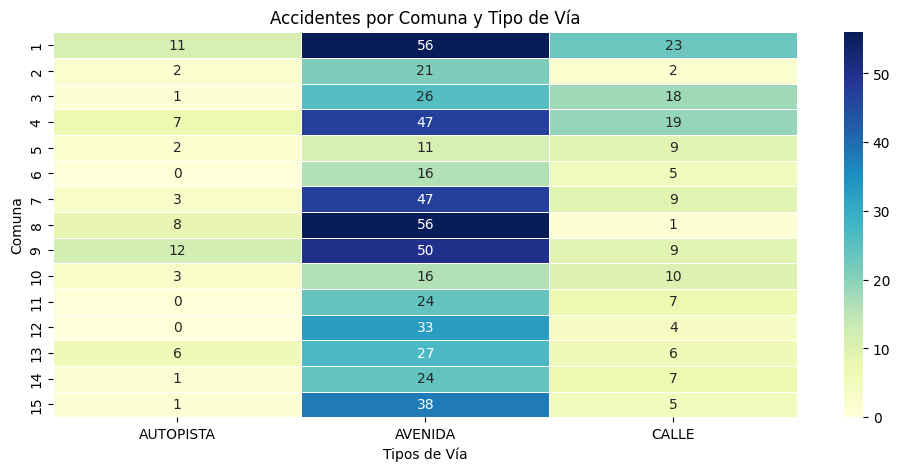

In [69]:
plt.figure(figsize=(12,5))
sns.heatmap(df_homicidios_comuna_tipo_calle, cmap='YlGnBu', annot=True, linewidths=.5)
plt.xlabel('Tipos de Vía')
plt.ylabel('Comuna')
plt.title('Accidentes por Comuna y Tipo de Vía')

<h3>Víctimas por tipo de calle</h3>

In [70]:
df_homicidios_victima_via = df_homicidios[['VICTIMA', 'TIPO_DE_CALLE', 'ID']].groupby(['VICTIMA', 'TIPO_DE_CALLE']).count()
df_homicidios_victima_via = df_homicidios_victima_via.unstack(level='TIPO_DE_CALLE')
df_homicidios_victima_via =  df_homicidios_victima_via.droplevel(0,axis='columns')
df_homicidios_victima_via.replace(np.nan,0, inplace=True)
df_homicidios_victima_via = df_homicidios_victima_via.astype(int)
df_homicidios_victima_via

TIPO_DE_CALLE,AUTOPISTA,AVENIDA,CALLE
VICTIMA,,,
AUTO,9,63,10
BICICLETA,0,18,11
CARGAS,2,4,1
MOTO,35,202,50
MOVIL,0,2,0
OBJETO FIJO,0,1,0
PASAJEROS,0,4,1
PEATON,10,195,56
PEATON_MOTO,0,0,1


Text(0.5, 1.0, 'Accidentes por Vía y tipo de victima')

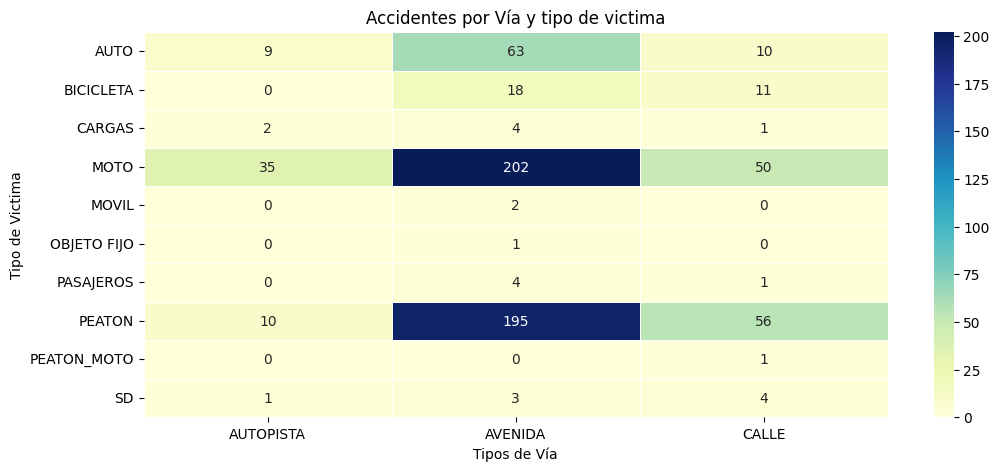

In [71]:
plt.figure(figsize=(12,5))
sns.heatmap(df_homicidios_victima_via, cmap='YlGnBu', annot=True, linewidths=.5, fmt='d')
plt.xlabel('Tipos de Vía')
plt.ylabel('Tipo de Victima')
plt.title('Accidentes por Vía y tipo de victima')

<h4>Cambiando el tipo de dato</h4>

In [72]:
df_homicidios['pos x'] = pd.to_numeric(df_homicidios['pos x'], errors='coerce')
df_homicidios['pos y'] = pd.to_numeric(df_homicidios['pos y'], errors='coerce')

<h4>Guardando archivo</h4>

In [73]:
df_homicidios.to_csv("homicidios.csv", index=False)